In [1]:
import time
start_time = time.time()
import os
HOME = os.environ['HOME']
# os.chdir(f'{HOME}/desktop/LTT1445_fits_files/Test/Tes2/Tes3/Tes4')
os.chdir(f'{HOME}/desktop/LTT1445_fits_files/Test/Tes2/Tes3')                    #2nd epoch
# os.chdir(f'{HOME}/desktop/LTT1445_fits_files/Test/Tes2')                         #1st epoch

In [2]:
import joblib
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from astropy.stats import mad_std, sigma_clip
import warnings
warnings.filterwarnings("ignore")

import exoplanet as xo

from arctor3 import Arctor, info_message

In [3]:
transit1 = [0,512,300,513]
transit2 = [0,512,178,220]
transit3 = [0,512,150,180]

In [4]:
def instantiate_arctor(planet_name, transit, data_dir, working_dir, file_type):
    planet = Arctor(
        planet_name=planet_name,
        data_dir=data_dir,
        working_dir=working_dir,
        file_type=file_type)

    joblib_filename = f'{planet_name}_savedict.joblib.save'
    joblib_filename = f'{working_dir}/{joblib_filename}'
    if os.path.exists(joblib_filename):
        info_message('Loading Data from Save File')
        planet.load_data(joblib_filename)
    else:
        info_message('Loading New Data Object')
        planet.load_data(transit)

    return planet

def create_raw_lc_stddev(planet):
    ppm = 1e6
    phot_vals = planet.photometry_df
    lc_std_rev = phot_vals.iloc[planet.idx_rev].std(axis=0)                
    lc_std_fwd = phot_vals.iloc[planet.idx_fwd].std(axis=0)                

    lc_med_rev = np.median(phot_vals.iloc[planet.idx_rev], axis=0)
    lc_med_fwd = np.median(phot_vals.iloc[planet.idx_rev], axis=0)

    lc_std = np.mean([lc_std_rev, lc_std_fwd], axis=0)
    lc_med = np.mean([lc_med_rev, lc_med_fwd], axis=0)

    return lc_std / lc_med * ppm

In [5]:
plot_verbose = False
save_now = False
planet_name = 'PlanetName'
file_type = 'flt.fits'

HOME = os.environ['HOME']
# base_dir = os.path.join(HOME, 'path', 'to', 'base')
# data_dir = os.path.join(base_dir, 'path', 'to', 'data')
# data_dir = os.path.join(data_dir, 'HST', 'FLTs')
# working_dir = os.path.join(base_dir, 'path', 'to', 'savefiles')
base_dir = os.path.join(HOME, 'desktop', 'LTT1445_fits_files', 'Test', 'Tes2', 'Tes3')        #2nd epoch
# base_dir = os.path.join(HOME, 'desktop', 'LTT1445_fits_files', 'Test', 'Tes2')                #1st epoch
data_dir = os.path.join(base_dir)
data_dir = os.path.join(data_dir)
working_dir = os.path.join(base_dir)

In [6]:
transit = transit1
planet = instantiate_arctor(planet_name, transit, data_dir, working_dir, file_type)
print(planet)

[INFO] Initializing Instance of the `Arctor` Object
[INFO] Loading New Data Object
[INFO] Loading Fits Files


100%|██████████████████████████████████████████████████████████████████████████████████| 94/94 [00:00<00:00, 171.72it/s]


[INFO] Creating New Flux/Error/Time Attributes


  3%|██▋                                                                                 | 3/94 [00:00<00:03, 27.07it/s]

image_shape (512, 213)
image_shape (512, 213)
image_shape (512, 213)
image_shape (512, 213)
image_shape (512, 213)


  6%|█████▎                                                                              | 6/94 [00:00<00:06, 14.06it/s]

image_shape (512, 213)
image_shape (512, 213)


  9%|███████▏                                                                            | 8/94 [00:00<00:08,  9.69it/s]

image_shape (512, 213)
image_shape (512, 213)
image_shape (512, 213)


 13%|██████████▌                                                                        | 12/94 [00:00<00:06, 12.14it/s]

image_shape (512, 213)
image_shape (512, 213)
image_shape (512, 213)
image_shape (512, 213)


 19%|███████████████▉                                                                   | 18/94 [00:01<00:04, 17.76it/s]

image_shape (512, 213)
image_shape (512, 213)
image_shape (512, 213)
image_shape (512, 213)
image_shape (512, 213)
image_shape (512, 213)


 22%|██████████████████▌                                                                | 21/94 [00:01<00:03, 18.92it/s]

image_shape (512, 213)
image_shape (512, 213)
image_shape (512, 213)
image_shape (512, 213)


 28%|██████████████████████▉                                                            | 26/94 [00:01<00:03, 18.11it/s]

image_shape (512, 213)
image_shape (512, 213)
image_shape (512, 213)
image_shape (512, 213)
image_shape (512, 213)


 34%|████████████████████████████▎                                                      | 32/94 [00:01<00:02, 22.24it/s]

image_shape (512, 213)
image_shape (512, 213)
image_shape (512, 213)
image_shape (512, 213)
image_shape (512, 213)
image_shape (512, 213)
image_shape (512, 213)


 41%|██████████████████████████████████▍                                                | 39/94 [00:02<00:02, 24.68it/s]

image_shape (512, 213)
image_shape (512, 213)
image_shape (512, 213)
image_shape (512, 213)


 45%|█████████████████████████████████████                                              | 42/94 [00:02<00:03, 15.21it/s]

image_shape (512, 213)
image_shape (512, 213)
image_shape (512, 213)


 51%|██████████████████████████████████████████▍                                        | 48/94 [00:02<00:02, 19.57it/s]

image_shape (512, 213)
image_shape (512, 213)
image_shape (512, 213)
image_shape (512, 213)
image_shape (512, 213)
image_shape (512, 213)
image_shape (512, 213)


 60%|█████████████████████████████████████████████████▍                                 | 56/94 [00:02<00:01, 26.61it/s]

image_shape (512, 213)
image_shape (512, 213)
image_shape (512, 213)
image_shape (512, 213)
image_shape (512, 213)
image_shape (512, 213)
image_shape (512, 213)


 69%|█████████████████████████████████████████████████████████▍                         | 65/94 [00:03<00:00, 34.03it/s]

image_shape (512, 213)
image_shape (512, 213)
image_shape (512, 213)
image_shape (512, 213)
image_shape (512, 213)
image_shape (512, 213)
image_shape (512, 213)
image_shape (512, 213)
image_shape (512, 213)


 73%|████████████████████████████████████████████████████████████▉                      | 69/94 [00:03<00:00, 33.89it/s]

image_shape (512, 213)
image_shape (512, 213)
image_shape (512, 213)
image_shape (512, 213)
image_shape (512, 213)
image_shape (512, 213)


 82%|███████████████████████████████████████████████████████████████████▉               | 77/94 [00:03<00:00, 31.30it/s]

image_shape (512, 213)
image_shape (512, 213)
image_shape (512, 213)
image_shape (512, 213)
image_shape (512, 213)
image_shape (512, 213)
image_shape (512, 213)
image_shape (512, 213)


 86%|███████████████████████████████████████████████████████████████████████▌           | 81/94 [00:03<00:00, 33.30it/s]

image_shape (512, 213)
image_shape (512, 213)
image_shape (512, 213)


 90%|███████████████████████████████████████████████████████████████████████████        | 85/94 [00:04<00:00, 18.80it/s]

image_shape (512, 213)
image_shape (512, 213)
image_shape (512, 213)
image_shape (512, 213)


100%|███████████████████████████████████████████████████████████████████████████████████| 94/94 [00:04<00:00, 21.04it/s]


image_shape (512, 213)
image_shape (512, 213)
image_shape (512, 213)
image_shape (512, 213)
image_shape (512, 213)
image_shape (512, 213)
image_shape (512, 213)
[INFO] Found 94 flt.fits files


In [7]:
planet.clean_cosmic_rays()
planet.calibration_trace_location()
planet.identify_trace_direction()
planet.simple_phots()
planet.center_all_traces()
planet.fit_trace_slopes()
planet.compute_sky_background(subpixels=32)
planet.compute_columnwise_sky_background()

[INFO] Flagging Cosmic Rays using `Temporal Simple` Technique


100%|█████████████████████████████████████████████████████████████████████████████████| 213/213 [00:11<00:00, 18.72it/s]


[INFO] Cosmic Ray Mask Creation Took 11.385099411010742 seconds
None
[INFO] Calibration the Median Trace Location
[INFO] Cubic Spline Interpolating the Median Trace Location
[INFO] Calibration the Per Image Trace Location


100%|██████████████████████████████████████████████████████████████████████████████████| 94/94 [00:00<00:00, 844.01it/s]


[INFO] Identifying Trace Direction per Image


100%|██████████████████████████████████████████████████████████████████████████████████| 94/94 [00:00<00:00, 408.26it/s]


[INFO] Computing the Center of the Trace


100%|███████████████████████████████████████████████████████████████████████████████████| 94/94 [01:02<00:00,  1.51it/s]


[INFO] Fitting a slope to the Center of the Trace


100%|██████████████████████████████████████████████████████████████████████████████████| 94/94 [00:00<00:00, 138.31it/s]


In [8]:
# Set up the list of aperture widths and heights to search
min_aper_width = 1
max_aper_width = 100
min_aper_height = 1
max_aper_height = 100

aper_widths = np.arange(min_aper_width, max_aper_width + 2, 5)
aper_heights = np.arange(min_aper_height, max_aper_height + 2, 5)

In [9]:
planet.do_multi_phot(aper_widths, aper_heights)
print("code took", (time.time()-start_time)/60, "minutes")

[INFO] Beginning Multi-Aperture Photometry
[69.10824452 72.36839758 71.29334711 72.85842058 69.5082633  73.78846425
 69.38325743 72.87342129 69.2632518  72.71841401 69.41825907 72.803418
 69.19824874 72.62340955 69.22825015 72.91342317 69.67827128 73.67845908
 69.11824499 74.48849711 69.1632471  72.92842387 69.25325133 73.07343068
 69.25325133 73.38844547 69.18324804 72.66341143 69.63326917 74.52349876
 68.87323349 72.92842387 69.55826565 73.28344054 70.5583126  73.06843044
 69.18324804 72.64841072 69.87828067 72.81841871 69.72827363 73.40844641
 69.18824827 73.66845861 69.64826987 72.54340579 69.32325461 72.78341706
 69.033241   72.82841917 69.08824358 72.96342551 70.54831213 73.34344335
 69.19824874 73.1634349  73.88846894 85.55401662 68.94323677 72.61840931
 69.33325508 72.80841824 69.30325367 73.45844875 69.01324006 73.73346166
 69.23825062 73.17343537 70.15829382 72.71341378 69.1632471  93.4793887
 69.08824358 73.79846472 69.28325273 75.56854782 69.09324381 72.78341706
 70.4533076

100%|██████████████████████████████████████████████████████████████████████████████████| 94/94 [00:00<00:00, 113.18it/s]


[INFO] Configuing Photoutils.Aperture_Photometry
[INFO] Computing Aperture Photometry per Image
done 1
<multiprocessing.pool.Pool state=RUN pool_size=7>
done 2
[<QTable length=1>
  id       xcenter           ycenter      ...  aperture_sum_438   aperture_sum_439   aperture_sum_440 
             pix               pix        ...                                                         
int64      float64           float64      ...      float64            float64            float64      
----- ----------------- ----------------- ... ------------------ ------------------ ------------------
    1 69.10824451852199 348.8228717583308 ... 27654151.087391865 28015318.870766476 28375685.966470975, <QTable length=1>
  id       xcenter           ycenter       ...  aperture_sum_438  aperture_sum_439   aperture_sum_440 
             pix               pix         ...                                                        
int64      float64           float64       ...      float64           float64    

    aperture_sum_1x1  aperture_sum_6x1  aperture_sum_11x1  aperture_sum_16x1  \
0       6.296293e+06      6.412166e+06       6.531044e+06       6.648012e+06   
1       6.519370e+06      6.620606e+06       6.724885e+06       6.830137e+06   
2       6.235962e+06      6.348219e+06       6.459498e+06       6.571002e+06   
3       6.491890e+06      6.610596e+06       6.712846e+06       6.812125e+06   
4       6.211405e+06      6.326723e+06       6.442572e+06       6.558612e+06   
..               ...               ...                ...                ...   
89      6.060079e+06      6.267385e+06       6.477939e+06       6.676975e+06   
90      5.900198e+06      6.002888e+06       6.108343e+06       6.218816e+06   
91      6.130891e+06      6.316016e+06       6.411481e+06       6.501086e+06   
92      5.860645e+06      5.962037e+06       6.062443e+06       6.167810e+06   
93      6.117932e+06      6.227573e+06       6.328939e+06       6.425505e+06   

    aperture_sum_21x1  aperture_sum_26x

In [10]:
planet_coarse_photometry_df = planet.photometry_df.copy()
planet.photometry_df


,aperture_sum_1x1,aperture_sum_6x1,aperture_sum_11x1,aperture_sum_16x1,aperture_sum_21x1,aperture_sum_26x1,aperture_sum_31x1,aperture_sum_36x1,aperture_sum_41x1,aperture_sum_46x1,...,aperture_sum_56x101,aperture_sum_61x101,aperture_sum_66x101,aperture_sum_71x101,aperture_sum_76x101,aperture_sum_81x101,aperture_sum_86x101,aperture_sum_91x101,aperture_sum_96x101,aperture_sum_101x101
0,6.296293e+06,6.412166e+06,6.531044e+06,6.648012e+06,6.761876e+06,6.873628e+06,6.989301e+06,7.108222e+06,7.226034e+06,7.341491e+06,...,2.507942e+07,2.545530e+07,2.582742e+07,2.619630e+07,2.656297e+07,2.692918e+07,2.729278e+07,2.765415e+07,2.801532e+07,2.837569e+07
1,6.519370e+06,6.620606e+06,6.724885e+06,6.830137e+06,6.928936e+06,7.024472e+06,7.121818e+06,7.220858e+06,7.315722e+06,7.403779e+06,...,2.558581e+07,2.595803e+07,2.633200e+07,2.669982e+07,2.706028e+07,2.741865e+07,2.778973e+07,2.816648e+07,2.853756e+07,2.889498e+07
2,6.235962e+06,6.348219e+06,6.459498e+06,6.571002e+06,6.683796e+06,6.799305e+06,6.913215e+06,7.024716e+06,7.136830e+06,7.250162e+06,...,2.541058e+07,2.577744e+07,2.613966e+07,2.650448e+07,2.687610e+07,2.724670e+07,2.760909e+07,2.796632e+07,2.832214e+07,2.868706e+07
3,6.491890e+06,6.610596e+06,6.712846e+06,6.812125e+06,6.909087e+06,7.007833e+06,7.107341e+06,7.202127e+06,7.292074e+06,7.380707e+06,...,2.565973e+07,2.603627e+07,2.640670e+07,2.676725e+07,2.712699e+07,2.749295e+07,2.786653e+07,2.823938e+07,2.860346e+07,2.895996e+07
4,6.211405e+06,6.326723e+06,6.442572e+06,6.558612e+06,6.673851e+06,6.788167e+06,6.902938e+06,7.017241e+06,7.131318e+06,7.245435e+06,...,2.512739e+07,2.549819e+07,2.587223e+07,2.624455e+07,2.661062e+07,2.697324e+07,2.733809e+07,2.770757e+07,2.807387e+07,2.843527e+07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
89,6.060079e+06,6.267385e+06,6.477939e+06,6.676975e+06,6.857418e+06,7.035170e+06,7.227872e+06,7.431097e+06,7.595069e+06,7.670956e+06,...,2.839817e+07,2.875316e+07,2.913435e+07,2.952395e+07,2.988680e+07,3.022019e+07,3.052757e+07,3.070181e+07,3.074097e+07,3.074366e+07
90,5.900198e+06,6.002888e+06,6.108343e+06,6.218816e+06,6.329807e+06,6.436357e+06,6.540319e+06,6.644101e+06,6.751098e+06,6.862759e+06,...,2.515560e+07,2.551441e+07,2.587769e+07,2.625126e+07,2.662741e+07,2.699694e+07,2.736235e+07,2.772402e+07,2.808400e+07,2.844710e+07
91,6.130891e+06,6.316016e+06,6.411481e+06,6.501086e+06,6.591264e+06,6.686569e+06,6.782923e+06,6.872281e+06,6.951769e+06,7.027680e+06,...,2.585137e+07,2.624060e+07,2.661694e+07,2.697221e+07,2.732307e+07,2.768694e+07,2.806615e+07,2.843983e+07,2.879162e+07,2.913300e+07
92,5.860645e+06,5.962037e+06,6.062443e+06,6.167810e+06,6.279025e+06,6.388279e+06,6.492663e+06,6.594919e+06,6.697476e+06,6.805219e+06,...,2.527612e+07,2.563637e+07,2.598734e+07,2.634742e+07,2.672672e+07,2.711381e+07,2.748240e+07,2.783197e+07,2.817751e+07,2.853792e+07


In [11]:
coarse_snr_lightcurves = create_raw_lc_stddev(planet)
coarse_min_snr = coarse_snr_lightcurves[coarse_snr_lightcurves.argmin()]
coarse_min_snr_colname = planet.photometry_df.columns[coarse_snr_lightcurves.argmin()]
coarse_min_snr_col = planet.normed_photometry_df[coarse_min_snr_colname]
coarse_temp = coarse_min_snr_colname.split('_')[-1].split('x')
coarse_min_snr_aper_width, coarse_min_snr_aper_height = np.int32(coarse_temp)

In [12]:
info_message(f'Coarse Aperture Photometry Resulted in {coarse_min_snr:0.0f}ppm with '
             f'{coarse_min_snr_aper_width}x{coarse_min_snr_aper_height} aperture size')

[INFO] Coarse Aperture Photometry Resulted in 3459ppm with 1x101 aperture size


In [13]:
fine_buffer = 10
fine_aper_widths = np.arange(coarse_min_snr_aper_width - fine_buffer,
                             coarse_min_snr_aper_width + fine_buffer)

fine_aper_heights = np.arange(coarse_min_snr_aper_height - fine_buffer,
                              coarse_min_snr_aper_height + fine_buffer)

[-9 -8 -7 -6 -5 -4 -3 -2 -1  0  1  2  3  4  5  6  7  8  9 10] [ 91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107 108
 109 110]
1 101


In [14]:
planet.do_multi_phot(fine_aper_widths, fine_aper_heights)

[INFO] Beginning Multi-Aperture Photometry
[69.10824452 72.36839758 71.29334711 72.85842058 69.5082633  73.78846425
 69.38325743 72.87342129 69.2632518  72.71841401 69.41825907 72.803418
 69.19824874 72.62340955 69.22825015 72.91342317 69.67827128 73.67845908
 69.11824499 74.48849711 69.1632471  72.92842387 69.25325133 73.07343068
 69.25325133 73.38844547 69.18324804 72.66341143 69.63326917 74.52349876
 68.87323349 72.92842387 69.55826565 73.28344054 70.5583126  73.06843044
 69.18324804 72.64841072 69.87828067 72.81841871 69.72827363 73.40844641
 69.18824827 73.66845861 69.64826987 72.54340579 69.32325461 72.78341706
 69.033241   72.82841917 69.08824358 72.96342551 70.54831213 73.34344335
 69.19824874 73.1634349  73.88846894 85.55401662 68.94323677 72.61840931
 69.33325508 72.80841824 69.30325367 73.45844875 69.01324006 73.73346166
 69.23825062 73.17343537 70.15829382 72.71341378 69.1632471  93.4793887
 69.08824358 73.79846472 69.28325273 75.56854782 69.09324381 72.78341706
 70.4533076

100%|███████████████████████████████████████████████████████████████████████████████████| 94/94 [00:01<00:00, 67.50it/s]

[INFO] Configuing Photoutils.Aperture_Photometry
[INFO] Computing Aperture Photometry per Image
done 1


<multiprocessing.pool.Pool state=RUN pool_size=7>
done 2
[<QTable length=1>
  id       xcenter           ycenter        aperture_sum_0   ...  aperture_sum_397  aperture_sum_398  aperture_sum_399 
             pix               pix                           ...                                                       
int64      float64           float64           float64       ...      float64           float64           float64      
----- ----------------- ----------------- ------------------ ... ----------------- ----------------- ------------------
    1 69.10824451852199 348.8228717583308 20028545.067580972 ... 21534318.81825543 21610561.87503243 21686866.762023777, <QTable length=1>
  id       xcenter           ycenter         aperture_sum_0  ... aperture_sum_397  aperture_sum_398  aperture_sum_399 
             pix               pix                           ...                                                      
int64      float64           float64            float64      ...   

    aperture_sum_-9x91  aperture_sum_-8x91  aperture_sum_-7x91  \
0         2.002855e+07        2.017455e+07        2.032110e+07   
1         2.005953e+07        2.020862e+07        2.035732e+07   
2         2.002708e+07        2.017313e+07        2.031992e+07   
3         2.004157e+07        2.018620e+07        2.033150e+07   
4         2.002725e+07        2.017342e+07        2.031958e+07   
..                 ...                 ...                 ...   
89        2.003307e+07        2.017636e+07        2.031914e+07   
90        2.003499e+07        2.018781e+07        2.034053e+07   
91        2.002764e+07        2.017243e+07        2.031720e+07   
92        2.003383e+07        2.018604e+07        2.033729e+07   
93        2.000255e+07        2.015091e+07        2.029904e+07   

    aperture_sum_-6x91  aperture_sum_-5x91  aperture_sum_-4x91  \
0         2.046763e+07        2.055280e+07        2.062412e+07   
1         2.050481e+07        2.065209e+07        2.079866e+07   
2        

[INFO] Adding column aperture_sum_2x96 to self.photometry_df
[INFO] Adding column aperture_sum_3x96 to self.photometry_df
[INFO] Adding column aperture_sum_4x96 to self.photometry_df
[INFO] Adding column aperture_sum_5x96 to self.photometry_df
[INFO] Adding column aperture_sum_7x96 to self.photometry_df
[INFO] Adding column aperture_sum_8x96 to self.photometry_df
[INFO] Adding column aperture_sum_9x96 to self.photometry_df
[INFO] Adding column aperture_sum_10x96 to self.photometry_df
[INFO] Adding column aperture_sum_-9x97 to self.photometry_df
[INFO] Adding column aperture_sum_-8x97 to self.photometry_df
[INFO] Adding column aperture_sum_-7x97 to self.photometry_df
[INFO] Adding column aperture_sum_-6x97 to self.photometry_df
[INFO] Adding column aperture_sum_-5x97 to self.photometry_df
[INFO] Adding column aperture_sum_-4x97 to self.photometry_df
[INFO] Adding column aperture_sum_-3x97 to self.photometry_df
[INFO] Adding column aperture_sum_-2x97 to self.photometry_df
[INFO] Adding c

[INFO] Adding column aperture_sum_-9x104 to self.photometry_df
[INFO] Adding column aperture_sum_-8x104 to self.photometry_df
[INFO] Adding column aperture_sum_-7x104 to self.photometry_df
[INFO] Adding column aperture_sum_-6x104 to self.photometry_df
[INFO] Adding column aperture_sum_-5x104 to self.photometry_df
[INFO] Adding column aperture_sum_-4x104 to self.photometry_df
[INFO] Adding column aperture_sum_-3x104 to self.photometry_df
[INFO] Adding column aperture_sum_-2x104 to self.photometry_df
[INFO] Adding column aperture_sum_-1x104 to self.photometry_df
[INFO] Adding column aperture_sum_0x104 to self.photometry_df
[INFO] Adding column aperture_sum_1x104 to self.photometry_df
[INFO] Adding column aperture_sum_2x104 to self.photometry_df
[INFO] Adding column aperture_sum_3x104 to self.photometry_df
[INFO] Adding column aperture_sum_4x104 to self.photometry_df
[INFO] Adding column aperture_sum_5x104 to self.photometry_df
[INFO] Adding column aperture_sum_6x104 to self.photometry_df

[INFO] Adding column aperture_sum_8x110 to self.photometry_df
[INFO] Adding column aperture_sum_9x110 to self.photometry_df
[INFO] Adding column aperture_sum_10x110 to self.photometry_df


In [15]:
planet_fine_photometry_df = planet.photometry_df.copy()

In [16]:
fine_snr_lightcurves = create_raw_lc_stddev(planet)
fine_min_snr = fine_snr_lightcurves[fine_snr_lightcurves.argmin()]
fine_min_snr_colname = planet.photometry_df.columns[fine_snr_lightcurves.argmin()]
fine_min_snr_flux = planet.normed_photometry_df[fine_min_snr_colname]
fine_min_snr_uncs = planet.normed_uncertainty_df[fine_min_snr_colname]
fine_temp = fine_min_snr_colname.split('_')[-1].split('x')
fine_min_snr_aper_width, fine_min_snr_aper_height = np.int32(fine_temp)

In [17]:
info_message(f'Fine Aperture Photometry Resulted in {fine_min_snr:0.0f}ppm with '
             f'{fine_min_snr_aper_width}x{fine_min_snr_aper_height} aperture size; '
             f'with median uncertainties of {np.median(fine_min_snr_uncs)*1e6:0.0f} ppm')

[INFO] Fine Aperture Photometry Resulted in 588ppm with -8x110 aperture size; with median uncertainties of 223 ppm


In [18]:
data_df = pd.DataFrame()
data_df['flux'] = fine_min_snr_flux.values
data_df['unc'] = fine_min_snr_uncs.values
data_df['times'] = planet.times
idx_fwd = planet.idx_fwd
idx_rev = planet.idx_rev
# data_df.sort_values('times', inplace=True)
# data_df = data_df.reset_index()
# data_df.drop(['index'], axis=1, inplace=True)
data_df

,flux,unc,times
0,0.999817,0.000222,59486.596360
1,1.001791,0.000223,59486.597239
2,0.999742,0.000222,59486.598119
3,1.000605,0.000223,59486.598998
4,0.999763,0.000222,59486.599878
...,...,...,...
89,1.000305,0.000223,59486.750144
90,1.000501,0.000223,59486.751024
91,1.000000,0.000223,59486.751903
92,1.000425,0.000223,59486.752783


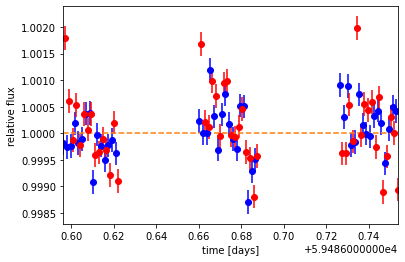

In [19]:
# Compute a limb-darkened light curve using starry
t = data_df['times']
u = []
flux = data_df['flux']
yerr = data_df['unc']
# Note: the `eval` is needed because this is using Theano in
# the background

plt.errorbar(t[idx_fwd], flux[idx_fwd], yerr[idx_fwd], fmt='o', color="b")
plt.errorbar(t[idx_rev], flux[idx_rev], yerr[idx_rev], fmt='o', color="r")
plt.axhline(1.0, ls='--', color='C1')
plt.ylabel("relative flux")
plt.xlabel("time [days]")
plt.xlim(t.min(), t.max());

In [26]:
fluxppm = (data_df['flux'] - 1)*1e6

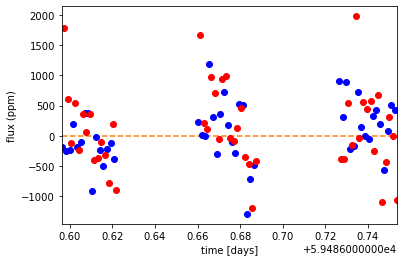

In [28]:
plt.errorbar(t[idx_fwd], fluxppm[idx_fwd], yerr[idx_fwd], fmt='o', color="b")
plt.errorbar(t[idx_rev], fluxppm[idx_rev], yerr[idx_rev], fmt='o', color="r")
plt.axhline(1.0, ls='--', color='C1')
plt.ylabel("flux (ppm)")
plt.xlabel("time [days]")
plt.xlim(t.min(), t.max());

In [ ]:
print("code took", (time.time()-start_time)/60, "minutes")